In [ ]:
import oapackage
import numpy as np
import pandas as pd
from AIS_for_SLDCP import *

In [38]:
DOETrails = pd.read_excel('DOE2.xlsx')

In [ ]:
DOETrails.A.unique()

In [39]:
DOETrails.columns = ['MaxItr', 'NP', 'CN']
MaxItr = [10, 20, 30, 40]
NP = [10, 15, 20, 25]
CN = [10, 15, 20, 25]
DOETrails.MaxItr = [MaxItr[DOETrails.MaxItr[i]-1] for i in range(DOETrails.shape[0])]
DOETrails.NP = [NP[DOETrails.NP[i]-1] for i in range(DOETrails.shape[0])]
DOETrails.CN = [CN[DOETrails.CN[i]-1] for i in range(DOETrails.shape[0])]

In [40]:
fn = lambda MaxItr, NP, CN: AISforFLDCP(MaxItr, CN, NP, ProblemName='ProblemStochastic 10X20_1')[0]

In [41]:
DOETrails['Response'] = None
for i in DOETrails.index:
   MaxItr, NP, CN, x = DOETrails.loc[i]   
   DOETrails.loc[i, 'Response'] = fn(MaxItr, NP, CN)
   print(i, MaxItr, NP, CN)

0 10 25 25
1 30 15 25
2 30 15 25
3 10 20 20
4 10 25 25
5 40 20 15
6 20 15 10
7 40 15 20
8 30 20 10
9 30 10 20
10 40 15 20
11 30 10 20
12 30 10 20
13 40 15 20
14 10 15 15
15 10 15 15
16 40 15 20
17 20 20 25
18 40 10 25
19 30 15 25
20 30 25 15
21 10 25 25
22 20 25 20
23 10 15 15
24 10 15 15
25 30 25 15
26 20 20 25
27 40 25 10
28 20 20 25
29 20 20 25
30 20 25 20
31 30 15 25
32 30 25 15
33 20 25 20
34 30 15 25
35 30 25 15
36 40 10 25
37 10 20 20
38 40 15 20
39 40 20 15
40 40 20 15
41 20 15 10
42 10 25 25
43 40 10 25
44 30 15 25
45 30 10 20
46 30 20 10
47 10 20 20
48 40 25 10
49 10 10 10
50 10 15 15
51 40 25 10
52 10 10 10
53 10 15 15
54 10 20 20
55 20 15 10
56 40 10 25
57 10 10 10
58 40 10 25
59 30 25 15
60 30 10 20
61 40 20 15
62 30 15 25
63 20 25 20
64 10 20 20
65 40 10 25
66 10 20 20
67 30 20 10
68 30 25 15
69 30 15 25
70 30 10 20
71 10 15 15
72 40 20 15
73 20 25 20
74 40 20 15
75 30 25 15
76 40 15 20
77 30 20 10
78 20 10 15
79 20 10 15
80 30 15 25
81 40 25 10
82 20 15 10
83 30 20 10
84

In [42]:
DOETrails.to_excel('DOEOutputs.xlsx', index=False)

In [50]:
import matplotlib.pyplot as plt

In [57]:
DOETrails.groupby(DOETrails.columns[0]).agg({'Response':snRatio}).index

Int64Index([10, 20, 30, 40], dtype='int64', name='MaxItr')

In [65]:
DOETrails.groupby(DOETrails.columns[0]).agg({'Response':snRatio}).index.astype('str')

Index(['10', '20', '30', '40'], dtype='object', name='MaxItr')

Text(0, 0.5, 'SN Ratio')

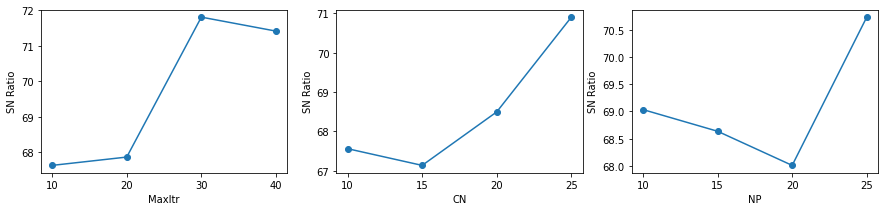

In [82]:
plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(DOETrails.groupby(DOETrails.columns[0]).agg({'Response':snRatio}).index.astype('str'), \
    DOETrails.groupby(DOETrails.columns[0]).agg({'Response':snRatio}), '-o')
plt.xlabel('MaxItr')
plt.ylabel('SN Ratio')

plt.subplot(1, 3, 2)
plt.plot(DOETrails.groupby(DOETrails.columns[1]).agg({'Response':snRatio}).index.astype('str'), \
    DOETrails.groupby(DOETrails.columns[1]).agg({'Response':snRatio}), '-o')
plt.xlabel('CN')
plt.ylabel('SN Ratio')

plt.subplot(1, 3, 3)
plt.plot(DOETrails.groupby(DOETrails.columns[2]).agg({'Response':snRatio}).index.astype('str'), \
    DOETrails.groupby(DOETrails.columns[2]).agg({'Response':snRatio}), '-o')
plt.xlabel('NP')
plt.ylabel('SN Ratio')

In [ ]:
import numpy as np

In [ ]:
snRatio = lambda x:10 * np.log(np.mean(x)**2/np.std(x)**2)

In [ ]:
DOETrails.MaxItr.unique()

In [ ]:
DOETrails.groupby('MaxItr').agg({'Response':(np.mean, np.std, snRatio)})

In [ ]:
X = (4 * np.random.rand(20, 3)).astype(int)
array = np.array(oapackage.array_link(X))
DOETrails = pd.DataFrame(array)
DOETrails.columns = ['MaxItr', 'NP', 'CN']
MaxItr = [30, 50, 70, 90]
NP = [15, 25, 35, 45]
CN = [10, 20, 40, 60]
DOETrails.MaxItr = [MaxItr[DOETrails.MaxItr[i]] for i in range(DOETrails.shape[0])]
DOETrails.NP = [NP[DOETrails.NP[i]] for i in range(DOETrails.shape[0])]
DOETrails.CN = [CN[DOETrails.CN[i]] for i in range(DOETrails.shape[0])]

In [ ]:
DOETrails.shape

In [ ]:
fn = lambda MaxItr, NP, CN: AISforFLDCP(MaxItr, CN, NP, ProblemName='ProblemStochastic 10X20_1')[0]

In [ ]:
SNFn = lambda mean, std: 10 * np.log(mean **2 / std ** 2)
DOETrails['Response'] = None
for i in DOETrails.index:
   MaxItr, NP, CN, x = DOETrails.loc[i]
   Results = np.array([fn(MaxItr, NP, CN) for _ in range(30)])
   DOETrails.loc[i, 'Response'] = SNFn(Results.mean(), Results.std())
   





In [1]:
from AIS_for_SLDCP import *

In [2]:
import pandas as pd

In [3]:
import HeuristicApproach_Stochastic as he

In [7]:
NumberOfProblems, MinTransCost, MaxTransCost, MinFixedCost, MaxFixedCost\
                     , NumberOFDistCenter, NumberOfPlants, MinDemand,  MaxDemand = \
                     3, 30, 100, 20, 90, 15, 10, 80, 120
he.GenerateProblems(NumberOfProblems, MinTransCost, MaxTransCost, MinFixedCost, MaxFixedCost\
                     , NumberOFDistCenter, NumberOfPlants, MinDemand,  MaxDemand)

In [4]:
import os
allFiles = os.listdir()
Problems = [i[:-5] for i in allFiles if i.endswith('.xlsx') and i.startswith('Prob')]

In [8]:
Problems = pd.Series(Problems).sort_values()

In [12]:
Problems = Problems.to_list()

In [15]:
ChanceProbability = 0.6
df = pd.DataFrame(columns=['Problem', 'Mean', 'RSD'])
cnt = 0
for i in Problems:
    results = np.array([AISforFLDCP(30, 15, 15, i, ChanceProbability)[0] for _ in range(10)])
    resultsMean = results.mean()
    resultRSD = results.std()/resultsMean
    df1 = pd.Series({'Problem':i, 'Mean':resultsMean, 'RSD':resultRSD})
    df.loc[cnt] = df1
    cnt += 1
    print(i)
    
df.to_excel('Computational_0.6.xlsx', index = False)
# AISforFLDCP(30, 25, 25, Problems[0], ChanceProbability)

ProblemStochastic 10X10_01
ProblemStochastic 10X10_02
ProblemStochastic 10X10_03
ProblemStochastic 15X10_01
ProblemStochastic 15X10_02
ProblemStochastic 15X10_03
ProblemStochastic 5X10_01
ProblemStochastic 5X10_02
ProblemStochastic 5X10_03
ProblemStochastic 5X5_01
ProblemStochastic 5X5_02
ProblemStochastic 5X5_03


In [16]:
ChanceProbability = 0.8
df = pd.DataFrame(columns=['Problem', 'Mean', 'RSD'])
cnt = 0
for i in Problems:
    results = np.array([AISforFLDCP(30, 15, 15, i, ChanceProbability)[0] for _ in range(10)])
    resultsMean = results.mean()
    resultRSD = results.std()/resultsMean
    df1 = pd.Series({'Problem':i, 'Mean':resultsMean, 'RSD':resultRSD})
    df.loc[cnt] = df1
    cnt += 1
    print(i)

df.to_excel('Computational_0.8.xlsx', index = False)

ProblemStochastic 10X10_01
ProblemStochastic 10X10_02
ProblemStochastic 10X10_03
ProblemStochastic 15X10_01
ProblemStochastic 15X10_02
ProblemStochastic 15X10_03
ProblemStochastic 5X10_01
ProblemStochastic 5X10_02
ProblemStochastic 5X10_03
ProblemStochastic 5X5_01
ProblemStochastic 5X5_02
ProblemStochastic 5X5_03


In [17]:
ChanceProbability = 0.9
df = pd.DataFrame(columns=['Problem', 'Mean', 'RSD'])
cnt = 0
for i in Problems:
    results = np.array([AISforFLDCP(30, 15, 15, i, ChanceProbability)[0] for _ in range(10)])
    resultsMean = results.mean()
    resultRSD = results.std()/resultsMean
    df1 = pd.Series({'Problem':i, 'Mean':resultsMean, 'RSD':resultRSD})
    df.loc[cnt] = df1
    cnt += 1
    print(i)

df.to_excel('Computational_0.9.xlsx', index = False)

ProblemStochastic 10X10_01
ProblemStochastic 10X10_02
ProblemStochastic 10X10_03
ProblemStochastic 15X10_01
ProblemStochastic 15X10_02
ProblemStochastic 15X10_03
ProblemStochastic 5X10_01
ProblemStochastic 5X10_02
ProblemStochastic 5X10_03
ProblemStochastic 5X5_01
ProblemStochastic 5X5_02
ProblemStochastic 5X5_03


In [37]:
df['Problem'][0][:df['Problem'][0].find('_')+1]+ f"{int(df['Problem'][0][df['Problem'][0].find('_')+1:]):02}"
# df['Problem'][0][df['Problem'][0].find('_')+1:] 



'ProblemStochastic 10X10_01'

In [47]:
df['Problem']=[i[:i.find('_')+1]+f"{int(i[i.find('_')+1:]):02}" for i in df['Problem']]

In [19]:
df1

Problem    ProblemStochastic 10X10_01
Mean                         127928.0
RSD                          0.019153
dtype: object

In [54]:
Newdf = pd.DataFrame(columns=['Problem', 'Mean', 'RSD'])
for i , j in df.sort_values(by='Problem').groupby('Problem'):
    print(i)


ProblemStochastic 10X10_01
ProblemStochastic 10X10_02
ProblemStochastic 10X10_03
ProblemStochastic 10X10_04
ProblemStochastic 10X10_05
ProblemStochastic 10X10_06
ProblemStochastic 10X10_07
ProblemStochastic 10X10_08
ProblemStochastic 10X10_09
ProblemStochastic 10X10_10
ProblemStochastic 10X15_01
ProblemStochastic 10X15_02
ProblemStochastic 10X15_03
ProblemStochastic 10X15_04
ProblemStochastic 10X15_05
ProblemStochastic 10X15_06
ProblemStochastic 10X15_07
ProblemStochastic 10X15_08
ProblemStochastic 10X15_09
ProblemStochastic 10X15_10
ProblemStochastic 10X20_01
ProblemStochastic 10X20_02
ProblemStochastic 10X20_03
ProblemStochastic 10X20_04
ProblemStochastic 10X20_05
ProblemStochastic 10X20_06
ProblemStochastic 10X20_07
ProblemStochastic 10X20_08
ProblemStochastic 10X20_09
ProblemStochastic 10X20_10
ProblemStochastic 5X10_01
ProblemStochastic 5X10_02
ProblemStochastic 5X10_03
ProblemStochastic 5X10_04
ProblemStochastic 5X10_05
ProblemStochastic 5X10_06
ProblemStochastic 5X10_07
ProblemS